In [1]:
import pvlib
import numpy as np
import pandas as pd  # for data wrangling
import matplotlib.pyplot as plt  # for visualization
import matplotlib.dates as mdates

plt.style.use('ggplot')

In [2]:
# Set location
site = pvlib.location.Location(53.21, -6.15, tz='UTC', altitude=20, name='Dublin, Ireland')

In [3]:
# Set time
time = [
    pd.date_range('01-01-2022', '12-02-2022', freq='D', tz=site.tz) - pd.Timedelta('12H'), # Year 2022
    pd.date_range('12-21-2022', '12-22-2022', freq='10min', tz=site.tz),                   # Winter Solstice
    pd.date_range('06-21-2022', '06-22-2022', freq='10min', tz=site.tz)                    # Summer Solstice
]

label = [
    'during the year 2022 at 12:00',
    'during the winter solstice 2022',
    'during the summer solstice 2022',
]

choice = 0

In [4]:
# Calculate solar position
solar_position = site.get_solarposition(times=time[choice])

# Gather the data for your dates
clearsky = site.get_clearsky(time[choice])

In [14]:
# Fix the angle of the module
tilt = 35
azimuth = 180

# Set a min and a max albedo
albedo_max = 0.193
albedo_min = 0.144

In [15]:
POA_irradiance_min = pvlib.irradiance.get_total_irradiance(
        surface_tilt = tilt,
        surface_azimuth = azimuth,
        dni = clearsky['dni'],
        ghi = clearsky['ghi'],
        dhi = clearsky['dhi'],
        solar_zenith = solar_position['apparent_zenith'],
        solar_azimuth = solar_position['azimuth'],
        model = 'isotropic',
        albedo=albedo_min)

POA_irradiance_max = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=azimuth,
        dni=clearsky['dni'],
        ghi=clearsky['ghi'],
        dhi=clearsky['dhi'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'],
        model = 'isotropic',
        albedo=albedo_max)

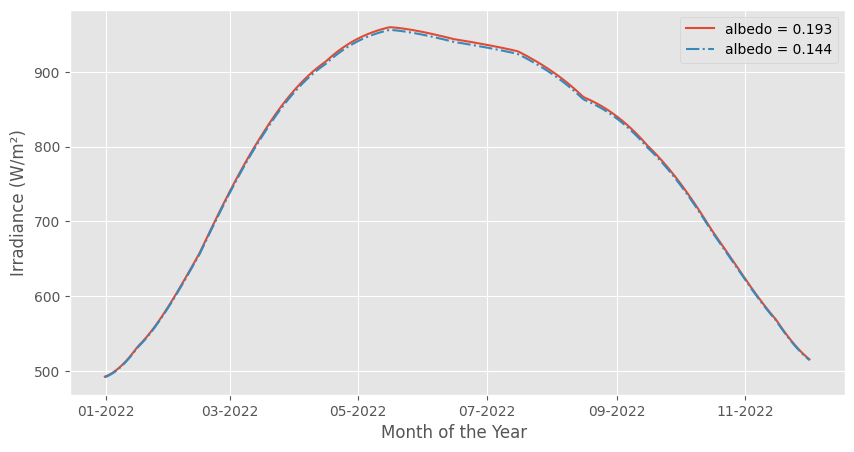

In [16]:
fig = plt.figure(figsize=(10,5))

# Plot the data
plt.plot(time[choice], POA_irradiance_max['poa_global'], '-', label='albedo = ' + str(albedo_max))
plt.plot(time[choice], POA_irradiance_min['poa_global'], '-.', label='albedo = ' + str(albedo_min))

# Format x-axis labels
if choice == 0:
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    plt.xlabel('Month of the Year ')

else:
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
    plt.xlabel('Hour of the Day')

# plt.title('Difference of the global irradiance on a module plane for two extrems albedos at 12:00')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.savefig('../Figures/Diff_POA_Albedo.png', dpi=300)
plt.show()

In [8]:
# Calculate the difference between the two arrays
difference = POA_irradiance_max['poa_global'] - POA_irradiance_min['poa_global']

# Find the maximum difference
np.max(difference)

8.326685002568638

In [9]:
pwd

'/home/boris/Documents/GitHub/Thesis/Scripts'